# Experimento 1: Modelo KNN

### Import das dependências

In [38]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Dataset

Leitura do dataset, já pré-processado e normalizado

In [39]:
train_data = pd.read_csv('./data/train_normalized_dataset.csv')
test_data = pd.read_csv('./data/test_normalized_dataset.csv')

In [40]:
train_data.head(10)

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,0.261743
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,0.228380
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,0.285777
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,0.581431
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,0.143584
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6952,6.0,5.0,0.0,-8.055780,-34.956390,False,rssi_1_1,0.528973
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8875,3.0,4.0,3.0,-8.049710,-34.954640,False,rssi_1_1,0.776637
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1926,5.0,3.0,3.0,-8.055494,-34.951316,True,rssi_1_1,0.370544
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,2641,5.0,3.0,3.0,-8.055684,-34.951331,True,rssi_1_1,0.013828
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3399,5.0,3.0,3.0,-8.055834,-34.951362,True,rssi_1_1,0.324846


In [41]:
test_data.head(10)

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,0,5.0,3.0,2.0,rssi_1_1,0.0
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3,5.0,3.0,2.0,rssi_1_1,0.0
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8,5.0,3.0,2.0,rssi_1_1,0.0
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,10,5.0,3.0,2.0,rssi_1_1,0.0
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,12,5.0,3.0,2.0,rssi_1_1,0.0
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,14,5.0,3.0,2.0,rssi_1_1,0.0
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,17,5.0,3.0,2.0,rssi_1_1,0.0
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,19,5.0,3.0,2.0,rssi_1_1,0.0
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,23,5.0,3.0,2.0,rssi_1_1,0.0
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,29,5.0,3.0,2.0,rssi_1_1,0.0


# Treinamento do modelo

In [42]:

numeric_features = ['grupo', 'cch', 'azimuth', 'ponto_id', 'delay_1', 'delay_2', 'delay_3','lat_y', 'lon_y', 'rssi_value']
numeric_data = train_data.copy()
numeric_data = numeric_data[numeric_features]
numeric_data.rename(columns={'lon_y': 'lon', 'lat_y': 'lat'}, inplace=True)
numeric_data.head(10)

,grupo,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat,lon,rssi_value
0,1,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,0.261743
1,1,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,0.228380
2,1,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,0.285777
3,1,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,0.581431
4,1,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,0.143584
5,1,873,0,6952,6.0,5.0,0.0,-8.055780,-34.956390,0.528973
6,1,873,0,8875,3.0,4.0,3.0,-8.049710,-34.954640,0.776637
7,1,873,0,1926,5.0,3.0,3.0,-8.055494,-34.951316,0.370544
8,1,873,0,2641,5.0,3.0,3.0,-8.055684,-34.951331,0.013828
9,1,873,0,3399,5.0,3.0,3.0,-8.055834,-34.951362,0.324846


In [43]:
X_train = numeric_data.drop(columns=['lat', 'lon', 'ponto_id'])
y_train = numeric_data[['lat', 'lon']]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.5s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=2, w

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [45]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

KNN_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'], 
                                weights=grid_search.best_params_['weights'], 
                                metric=grid_search.best_params_['metric'])

KNN_model.fit(X_train, y_train)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best cross-validation score: 0.00


KNeighborsRegressor(metric='manhattan', n_neighbors=20, weights='distance')

In [46]:
predictions = KNN_model.predict(X_val)
predictions

array([[ -8.055684  , -34.951331  ],
       [ -8.055494  , -34.951316  ],
       [ -8.055786  , -34.951505  ],
       ...,
       [ -8.0557665 , -34.95134805],
       [ -8.055506  , -34.951693  ],
       [ -8.049964  , -34.9547205 ]])

# Resultados

In [16]:
def haversine_distance(y_true, y_pred):
    lat1, lon1 = y_pred[:, 0], y_pred[:, 1]
    lat2, lon2 = y_true[:, 0], y_true[:, 1]

    # Converte latitudes e longitudes de graus para radianos
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Diferenças das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Raio da Terra em metros: 6,371,000
    radius = 6371000

    distance = radius * c
    return distance

In [17]:
distances = haversine_distance(y_val.values, predictions)

# Erro máximo e mínimo na distância euclidiana
min_distance_error = np.min(distances)
mean_distance_error = np.mean(distances)
max_distance_error = np.max(distances)
std_distance_error = np.std(distances)

print(f'Erro mínimo na distância(em metros): {min_distance_error}')
print(f'Erro médio na distância(em metros): {mean_distance_error}')
print(f'Erro máximo na distância(em metros): {max_distance_error}')
print(f'Desvio padrão do erro na distância(em metros): {std_distance_error}')

Erro mínimo na distância(em metros): 0.0
Erro médio na distância(em metros): 12.535095775008362
Erro máximo na distância(em metros): 260.8224505285983
Desvio padrão do erro na distância(em metros): 25.079982370039183


In [18]:
mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)

accuracy = KNN_model.score(X_val, y_val)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'Accuracy: {accuracy}')

MAE: 7.092834453787647e-05
MSE: 3.2062360202089265e-08
Accuracy: 0.9939819820238347


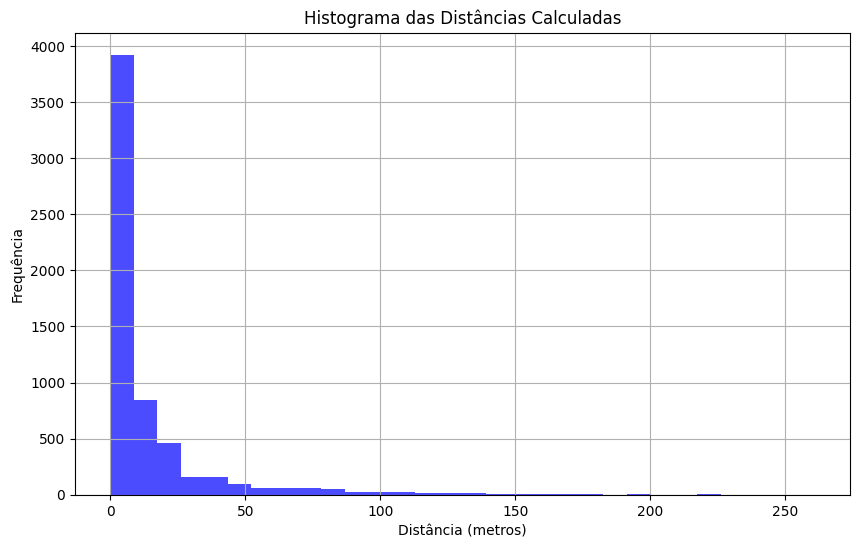

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='blue', alpha=0.7)
plt.title('Histograma das Distâncias Calculadas')
plt.xlabel('Distância (metros)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

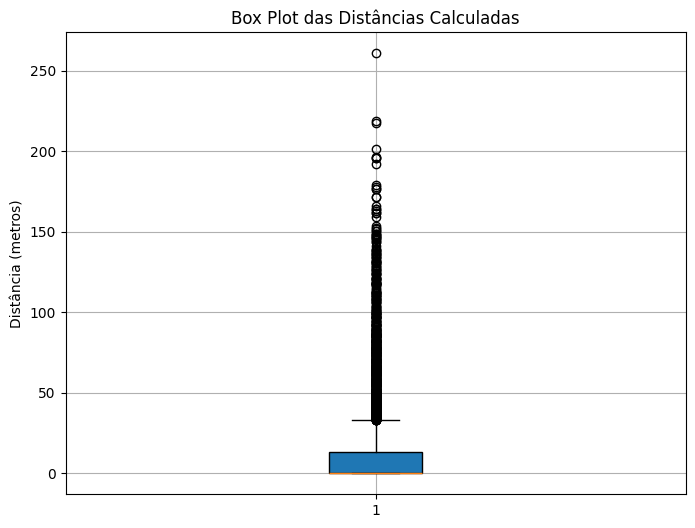

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(distances, vert=True, patch_artist=True)
plt.title('Box Plot das Distâncias Calculadas')
plt.ylabel('Distância (metros)')
plt.grid(True)
plt.show()

# Visualização do mapa

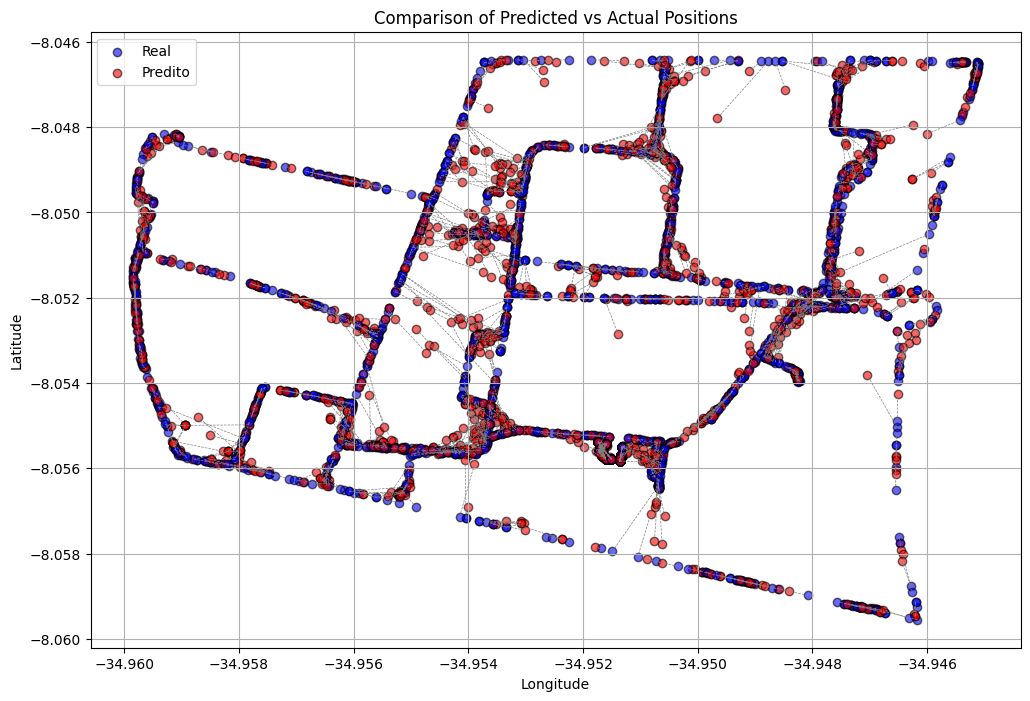

In [21]:
def plot_comparison_map(y_true, y_pred):
    # Configurar a figura e o eixo
    fig, ax = plt.subplots(figsize=(12, 8))

    # Desenhar cada par de pontos reais e preditos
    for real, pred in zip(y_true, y_pred):
        # Pontos reais em azul
        ax.scatter(real[1], real[0], color='blue', label='Real', alpha=0.6, edgecolor='black')
        # Pontos preditos em vermelho
        ax.scatter(pred[1], pred[0], color='red', label='Predito', alpha=0.6, edgecolor='black')
        # Linha entre real e predito
        ax.plot([real[1], pred[1]], [real[0], pred[0]], 'gray', linestyle='--', linewidth=0.5)

    # Configurações de exibição
    ax.set_title('Comparison of Predicted vs Actual Positions')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)
    
    # Adicionar legendas apenas uma vez
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Mostrar o gráfico
    plt.show()

plot_comparison_map(y_val.values, predictions)

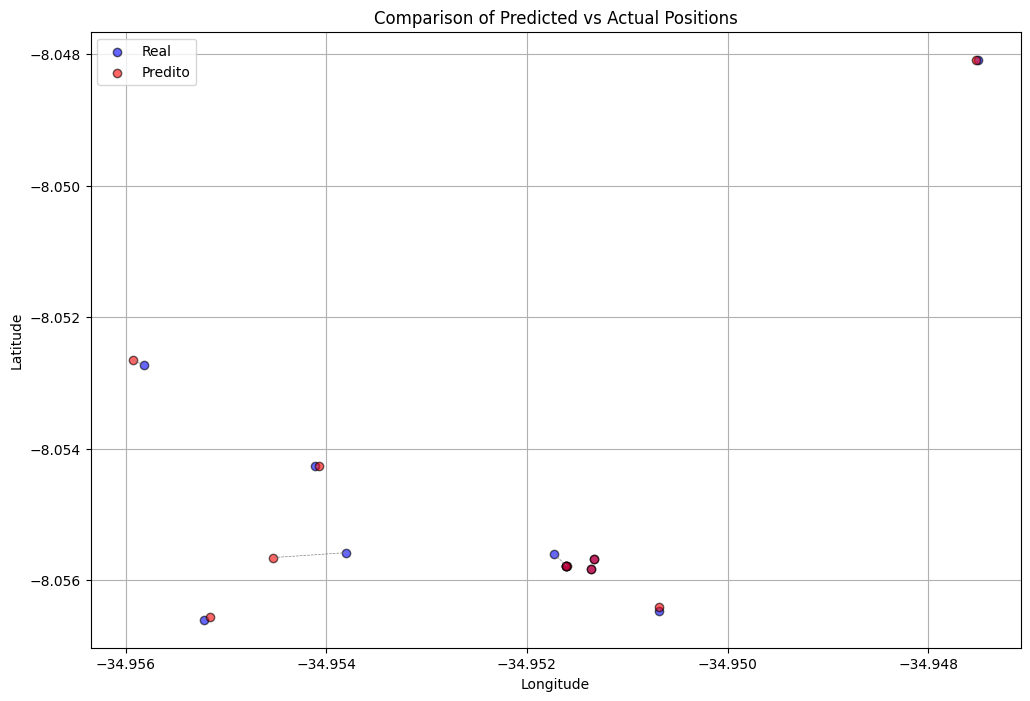

In [22]:
plot_comparison_map(y_val.values[10:21], predictions[10:21])


In [48]:
numeric_test_features = ['grupo', 'lat', 'lon', 'cch', 'azimuth', 'ponto_id', 'delay_1', 'delay_2', 'delay_3', 'rssi_value']
numeric_test_data = test_data.copy()
numeric_test_data = numeric_test_data[numeric_test_features]

numeric_test_data.head(10)

,grupo,lat,lon,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,rssi_value
0,1,-8.04342,-34.952,873,0,0,5.0,3.0,2.0,0.0
1,1,-8.04342,-34.952,873,0,3,5.0,3.0,2.0,0.0
2,1,-8.04342,-34.952,873,0,8,5.0,3.0,2.0,0.0
3,1,-8.04342,-34.952,873,0,10,5.0,3.0,2.0,0.0
4,1,-8.04342,-34.952,873,0,12,5.0,3.0,2.0,0.0
5,1,-8.04342,-34.952,873,0,14,5.0,3.0,2.0,0.0
6,1,-8.04342,-34.952,873,0,17,5.0,3.0,2.0,0.0
7,1,-8.04342,-34.952,873,0,19,5.0,3.0,2.0,0.0
8,1,-8.04342,-34.952,873,0,23,5.0,3.0,2.0,0.0
9,1,-8.04342,-34.952,873,0,29,5.0,3.0,2.0,0.0


In [47]:
import pandas as pd

# Supondo que você já tem seu modelo KNN carregado e pronto para fazer previsões
# Aqui também assumimos que numeric_test_data e test_data são DataFrames já definidos

ponto_ids = test_data['ponto_id'].tolist()

# Preparando os dados de teste
X_test = numeric_test_data.drop(columns=['lat', 'lon', 'ponto_id'])
y_test = numeric_test_data[['lat', 'lon']]

# Realizando as previsões
predictions = KNN_model.predict(X_test)

# Criando o DataFrame combinado com colunas separadas para latitude e longitude
submit_df = pd.DataFrame({
    'ponto_id': ponto_ids,
    'lat': predictions[:, 0],  # Latitude
    'lon': predictions[:, 1]   # Longitude
})

# Exportando para um arquivo CSV na pasta 'data'
submit_df.to_csv('data/Resultados_Equipe4_KNN2.csv', index=False)


In [25]:
%pip install ctgan

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
from ctgan import CTGAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Carregar o dataset
data = numeric_data.copy()

# Verifique se os dados foram carregados e processados corretamente
print(data.head())

   grupo  cch  azimuth  ponto_id  delay_1  delay_2  delay_3       lat  \
0      1  873        0      6604      5.0      3.0      2.0 -8.055786   
1      1  873        0      5515      5.0      3.0      2.0 -8.055784   
2      1  873        0      5049      5.0      3.0      2.0 -8.055506   
3      1  873        0      8737      4.0      7.0      2.0 -8.050390   
4      1  873        0      1203      5.0      3.0      2.0 -8.055380   

         lon  rssi_value  
0 -34.951505    0.261743  
1 -34.951608    0.228380  
2 -34.951693    0.285777  
3 -34.959630    0.581431  
4 -34.951736    0.143584  


In [27]:
# Definir o modelo CTGAN
model = CTGAN()

# Treinar o modelo
model.fit(data, epochs=500)

# Gerar novos dados sintéticos
new_data = model.sample(30000)

# Mostrar os primeiros registros dos dados gerados
print(new_data.head())

# salvando os dados gerados
new_data.to_csv('data/synthetic_data.csv', index=False)

   grupo  cch  azimuth  ponto_id   delay_1   delay_2   delay_3       lat  \
0      1  872      120      4910  4.999612  2.999441  1.999683 -8.055729   
1      1  875      240      3396  4.999964  3.000168  2.998894 -8.055754   
2      2  874      120      4385  5.000587  3.000172  1.999799 -8.054985   
3      1  872      120      7906  3.004024  2.998630  4.994818 -8.050165   
4      3  869      240      2845  4.999331  2.999481  2.999859 -8.055938   

         lon  rssi_value  
0 -34.951811    0.014321  
1 -34.951985    0.008045  
2 -34.951910    0.241099  
3 -34.947382    0.530870  
4 -34.951283    0.014218  


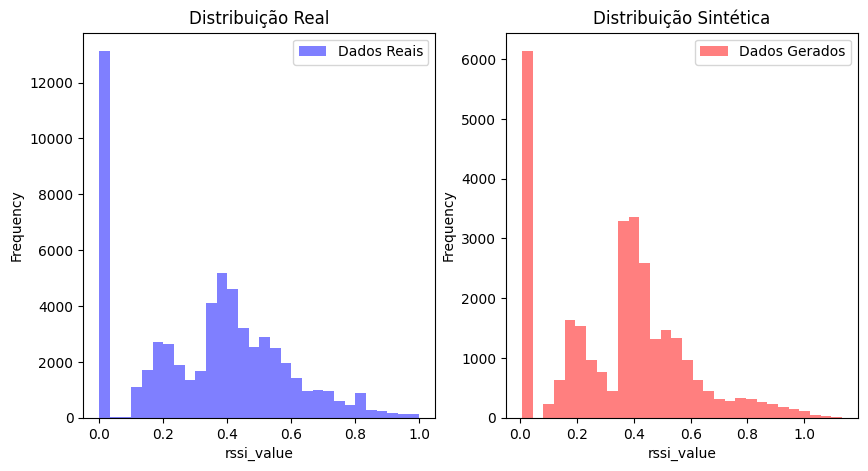

In [28]:
# Comparar distribuições de uma coluna, por exemplo 'rssi_value'
plt.figure(figsize=(10, 5))

# Dados reais
plt.subplot(1, 2, 1)
plt.hist(data['rssi_value'], bins=30, alpha=0.5, label='Dados Reais', color='blue')
plt.title('Distribuição Real')
plt.xlabel('rssi_value')
plt.ylabel('Frequency')
plt.legend()

# Dados gerados
plt.subplot(1, 2, 2)
plt.hist(new_data['rssi_value'], bins=30, alpha=0.5, label='Dados Gerados', color='red')
plt.title('Distribuição Sintética')
plt.xlabel('rssi_value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [36]:
new_data = pd.read_csv('data/synthetic_data.csv')


numeric_features = ['grupo', 'cch', 'azimuth', 'ponto_id', 'delay_1', 'delay_2', 'delay_3','lat', 'lon', 'rssi_value']
numeric_data = new_data.copy()
numeric_data = numeric_data[numeric_features]

numeric_data.head(10)

X_train = numeric_data.drop(columns=['lat', 'lon', 'ponto_id'])
y_train = numeric_data[['lat', 'lon']]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

KNN_model.fit(X_train, y_train)



KNeighborsRegressor(metric='manhattan', n_neighbors=20, weights='distance')

In [37]:
predictions = KNN_model.predict(X_val)

distances = haversine_distance(y_val.values, predictions)

# Erro máximo e mínimo na distância euclidiana
min_distance_error = np.min(distances)
mean_distance_error = np.mean(distances)
max_distance_error = np.max(distances)
std_distance_error = np.std(distances)

print(f'Erro mínimo na distância(em metros): {min_distance_error}')
print(f'Erro médio na distância(em metros): {mean_distance_error}')
print(f'Erro máximo na distância(em metros): {max_distance_error}')
print(f'Desvio padrão do erro na distância(em metros): {std_distance_error}')

Erro mínimo na distância(em metros): 0.5831765941239373
Erro médio na distância(em metros): 115.01987123857909
Erro máximo na distância(em metros): 1455.9186692682854
Desvio padrão do erro na distância(em metros): 132.95690465778398


In [32]:
numeric_test_features = ['grupo', 'lat', 'lon', 'cch', 'azimuth', 'ponto_id', 'delay_1', 'delay_2', 'delay_3', 'rssi_value']
numeric_test_data = test_data.copy()
numeric_test_data = numeric_test_data[numeric_test_features]

numeric_test_data.head(10)

,grupo,lat,lon,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,rssi_value
0,1,-8.04342,-34.952,873,0,0,5.0,3.0,2.0,0.0
1,1,-8.04342,-34.952,873,0,3,5.0,3.0,2.0,0.0
2,1,-8.04342,-34.952,873,0,8,5.0,3.0,2.0,0.0
3,1,-8.04342,-34.952,873,0,10,5.0,3.0,2.0,0.0
4,1,-8.04342,-34.952,873,0,12,5.0,3.0,2.0,0.0
5,1,-8.04342,-34.952,873,0,14,5.0,3.0,2.0,0.0
6,1,-8.04342,-34.952,873,0,17,5.0,3.0,2.0,0.0
7,1,-8.04342,-34.952,873,0,19,5.0,3.0,2.0,0.0
8,1,-8.04342,-34.952,873,0,23,5.0,3.0,2.0,0.0
9,1,-8.04342,-34.952,873,0,29,5.0,3.0,2.0,0.0


In [33]:
import pandas as pd

# Supondo que você já tem seu modelo KNN carregado e pronto para fazer previsões
# Aqui também assumimos que numeric_test_data e test_data são DataFrames já definidos

ponto_ids = test_data['ponto_id'].tolist()

# Preparando os dados de teste
X_test = numeric_test_data.drop(columns=['lat', 'lon', 'ponto_id'])
y_test = numeric_test_data[['lat', 'lon']]

# Realizando as previsões
predictions = KNN_model.predict(X_test)

# Criando o DataFrame combinado com colunas separadas para latitude e longitude
submit_df = pd.DataFrame({
    'ponto_id': ponto_ids,
    'lat': predictions[:, 0],  # Latitude
    'lon': predictions[:, 1]   # Longitude
})

# Exportando para um arquivo CSV na pasta 'data'
submit_df.to_csv('data/Resultados_Equipe4_KNN2.csv', index=False)
